In [1]:
# import the library module for SHA
import sys
import hashlib
import numpy

if sys.version_info < (3, 6):
	import sha3

In [2]:
# initialize a string
x = numpy.random.rand(64)

# create sha3-256 hash objects
obj_sha3_256 = hashlib.sha3_256(x)

# print in hexadecimal
print("\nSHA3-256 Hash 1: ", obj_sha3_256.hexdigest())
x_2 = obj_sha3_256.digest()
x_3 = obj_sha3_256.hexdigest()
#print(x_2)
#obj_sha3_256_2 = hashlib.sha3_256(x_2)
#print("\nSHA3-256 Hash 2: ", obj_sha3_256_2.hexdigest())


SHA3-256 Hash 1:  2fae5ece57f5327c1c073164ba17c0ad4d7444bc7022c444bdde623f4dfa6ef7


In [3]:
# initialize hex string
ini_string = x_3
scale = 16

# printing initial string
print ("Initial string", ini_string)

# code to convert hex to binary
res = bin(int(ini_string, scale)).zfill(8)

# print the resultant string
print ("Resultant string", str(res))

array_5_bit_values = []

i = 0

while i < 51 : 
  five_bits = res[5*i+2:5*i+7]
  array_5_bit_values.append(five_bits)
  i = i + 1


print(array_5_bit_values)

Initial string 2fae5ece57f5327c1c073164ba17c0ad4d7444bc7022c444bdde623f4dfa6ef7
Resultant string 0b10111110101110010111101100111001010111111101010011001001111100000111000000011100110001011001001011101000010111110000001010110101001101011101000100010010111100011100000010001011000100010001001011110111011110011000100011111101001101111110100110111011110111
['10111', '11010', '11100', '10111', '10110', '01110', '01010', '11111', '11010', '10011', '00100', '11111', '00000', '11100', '00000', '11100', '11000', '10110', '01001', '01110', '10000', '10111', '11000', '00010', '10110', '10100', '11010', '11101', '00010', '00100', '10111', '10001', '11000', '00010', '00101', '10001', '00010', '00100', '10111', '10111', '01111', '00110', '00100', '01111', '11010', '01101', '11111', '01001', '10111', '01111', '0111']


In [4]:
# input = 

In [5]:
# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, IBMQ, execute
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

# useful additional packages 
import numpy as np #library for scientific computing

# from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

In [6]:
#setting the quantum circuit
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')

circuit = QuantumCircuit(qreg_q, creg_c)

In [7]:
#loading the bitchain
bitchain = [0,1,1,0,1]
for i in range(len(bitchain)):
    if bitchain[i] == 1:
        circuit.x(qreg_q[i])     

In [8]:
#program the circuit
circuit.h(qreg_q[0])
# circuit.x(qreg_q[1])
# circuit.x(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[3])
circuit.swap(qreg_q[3], qreg_q[4])
circuit.h(qreg_q[4])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])

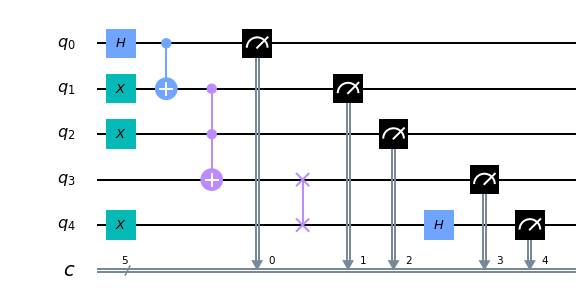

In [9]:
#draw the quantum circuit
circuit.draw(output='mpl')

In [10]:
# backend = BasicAer.get_backend('qasm_simulator') # run on local simulator by default 

# # Uncomment the following lines to run on a real device
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

# Load local account information
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

Remote backend "ibmq_lima" could not be instantiated due to an invalid config: "{'gates': {5: {'parameters': ['Field may not be null.'], 'qasm_def': ['Field may not be null.'], 'coupling_map': ['Shorter than minimum length 1.']}}}"
Remote backend "ibmq_belem" could not be instantiated due to an invalid config: "{'gates': {5: {'parameters': ['Field may not be null.'], 'qasm_def': ['Field may not be null.'], 'coupling_map': ['Shorter than minimum length 1.']}}}"
Remote backend "ibmq_quito" could not be instantiated due to an invalid config: "{'gates': {5: {'parameters': ['Field may not be null.'], 'qasm_def': ['Field may not be null.'], 'coupling_map': ['Shorter than minimum length 1.']}}}"
Remote backend "ibmq_manila" could not be instantiated due to an invalid config: "{'gates': {5: {'parameters': ['Field may not be null.'], 'qasm_def': ['Field may not be null.'], 'coupling_map': ['Shorter than minimum length 1.']}}}"


least busy backend:  ibmq_bogota


In [11]:
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q')
# backend = provider.backend.ibmq_manila

In [12]:
# from qiskit import IBMQ, schedule
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
# backend = provider.get_backend('ibmq_manila')

In [15]:
# run job and result
# QPoW_job = execute(circuit, backend)
QPoW_results = QPoW_job.result()
job_monitor(QPoW_job)

IBMQJobApiError: '"{\'results\': {0: {\'seed\': [\'Field may not be null.\'], \'meas_return\': [\'Field may not be null.\'], \'data\': {\'statevector\': [\'Field may not be null.\'], \'unitary\': [\'Field may not be null.\'], \'memory\': [\'Field may not be null.\'], \'snapshots\': [\'Field may not be null.\']}, \'status\': [\'Field may not be null.\']}}}"'

In [14]:
# plot results
plot_histogram(QPoW_results.get_counts(circuit))

NameError: name 'QPoW_results' is not defined

In [ ]:
output = list(QPoW_results.get_counts(circuit))
output_cat = ''.join(output)

In [ ]:
output_cat

In [ ]:
encoded_str = str.encode(output_cat)
obj_sha3_256_3 = hashlib.sha3_256(encoded_str)
print("\nSHA3-256 Hash 3: ", obj_sha3_256_3.hexdigest())